In [3]:
# Import the necessary packages

import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.offline import iplot, init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [4]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [5]:
os.listdir('./train')

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [6]:
os.listdir(os.path.join('train','Mild'))

['0024cdab0c1e.png',
 '00cb6555d108.png',
 '0124dffecf29.png',
 '01b3aed3ed4c.png',
 '0369f3efe69b.png',
 '03e25101e8e8.png',
 '04ac765f91a1.png',
 '059bc89df7f4.png',
 '05a5183c92d0.png',
 '0684311afdfc.png',
 '06b71823f9cd.png',
 '07929d32b5b3.png',
 '07a1c7073982.png',
 '086d41d17da8.png',
 '09935d72892b.png',
 '0a3202889f4d.png',
 '0a61bddab956.png',
 '0ad7f631dedb.png',
 '0d310aba6373.png',
 '0dc031c94225.png',
 '0dce95217626.png',
 '0eb52045349f.png',
 '0f495d87656a.png',
 '0fb1053285cf.png',
 '101b9ebfc720.png',
 '107aea0d9289.png',
 '10f36b0239fb.png',
 '1116271db4ea.png',
 '111898ab463d.png',
 '12ce6a1a1f31.png',
 '12e3f5f2cb17.png',
 '13ab8db8c700.png',
 '15cc2aef772a.png',
 '172df1330a60.png',
 '17eff993386f.png',
 '18b06f56ab27.png',
 '194814669fee.png',
 '19722bff5a09.png',
 '19e350c7c83c.png',
 '1a03a7970337.png',
 '1b329a127307.png',
 '1bb0ddfe753a.png',
 '1c0cf251b426.png',
 '1c3a6b4449e9.png',
 '1d11794057ff.png',
 '1d674e2e32e0.png',
 '1df3e03a8f5f.png',
 '1e8a1fdee5b

In [7]:
train = []
label = []

for i in os.listdir('./train'):
    train_class = os.listdir(os.path.join('train',i))
    for j in train_class:
        img=os.path.join('train',i,j)
        train.append(img)
        label.append(i)

print('Number of train images : {} \n'.format(len(train)))

Number of train images : 3662 



In [8]:
train

['train\\Mild\\0024cdab0c1e.png',
 'train\\Mild\\00cb6555d108.png',
 'train\\Mild\\0124dffecf29.png',
 'train\\Mild\\01b3aed3ed4c.png',
 'train\\Mild\\0369f3efe69b.png',
 'train\\Mild\\03e25101e8e8.png',
 'train\\Mild\\04ac765f91a1.png',
 'train\\Mild\\059bc89df7f4.png',
 'train\\Mild\\05a5183c92d0.png',
 'train\\Mild\\0684311afdfc.png',
 'train\\Mild\\06b71823f9cd.png',
 'train\\Mild\\07929d32b5b3.png',
 'train\\Mild\\07a1c7073982.png',
 'train\\Mild\\086d41d17da8.png',
 'train\\Mild\\09935d72892b.png',
 'train\\Mild\\0a3202889f4d.png',
 'train\\Mild\\0a61bddab956.png',
 'train\\Mild\\0ad7f631dedb.png',
 'train\\Mild\\0d310aba6373.png',
 'train\\Mild\\0dc031c94225.png',
 'train\\Mild\\0dce95217626.png',
 'train\\Mild\\0eb52045349f.png',
 'train\\Mild\\0f495d87656a.png',
 'train\\Mild\\0fb1053285cf.png',
 'train\\Mild\\101b9ebfc720.png',
 'train\\Mild\\107aea0d9289.png',
 'train\\Mild\\10f36b0239fb.png',
 'train\\Mild\\1116271db4ea.png',
 'train\\Mild\\111898ab463d.png',
 'train\\Mild\

In [9]:
label

['Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 

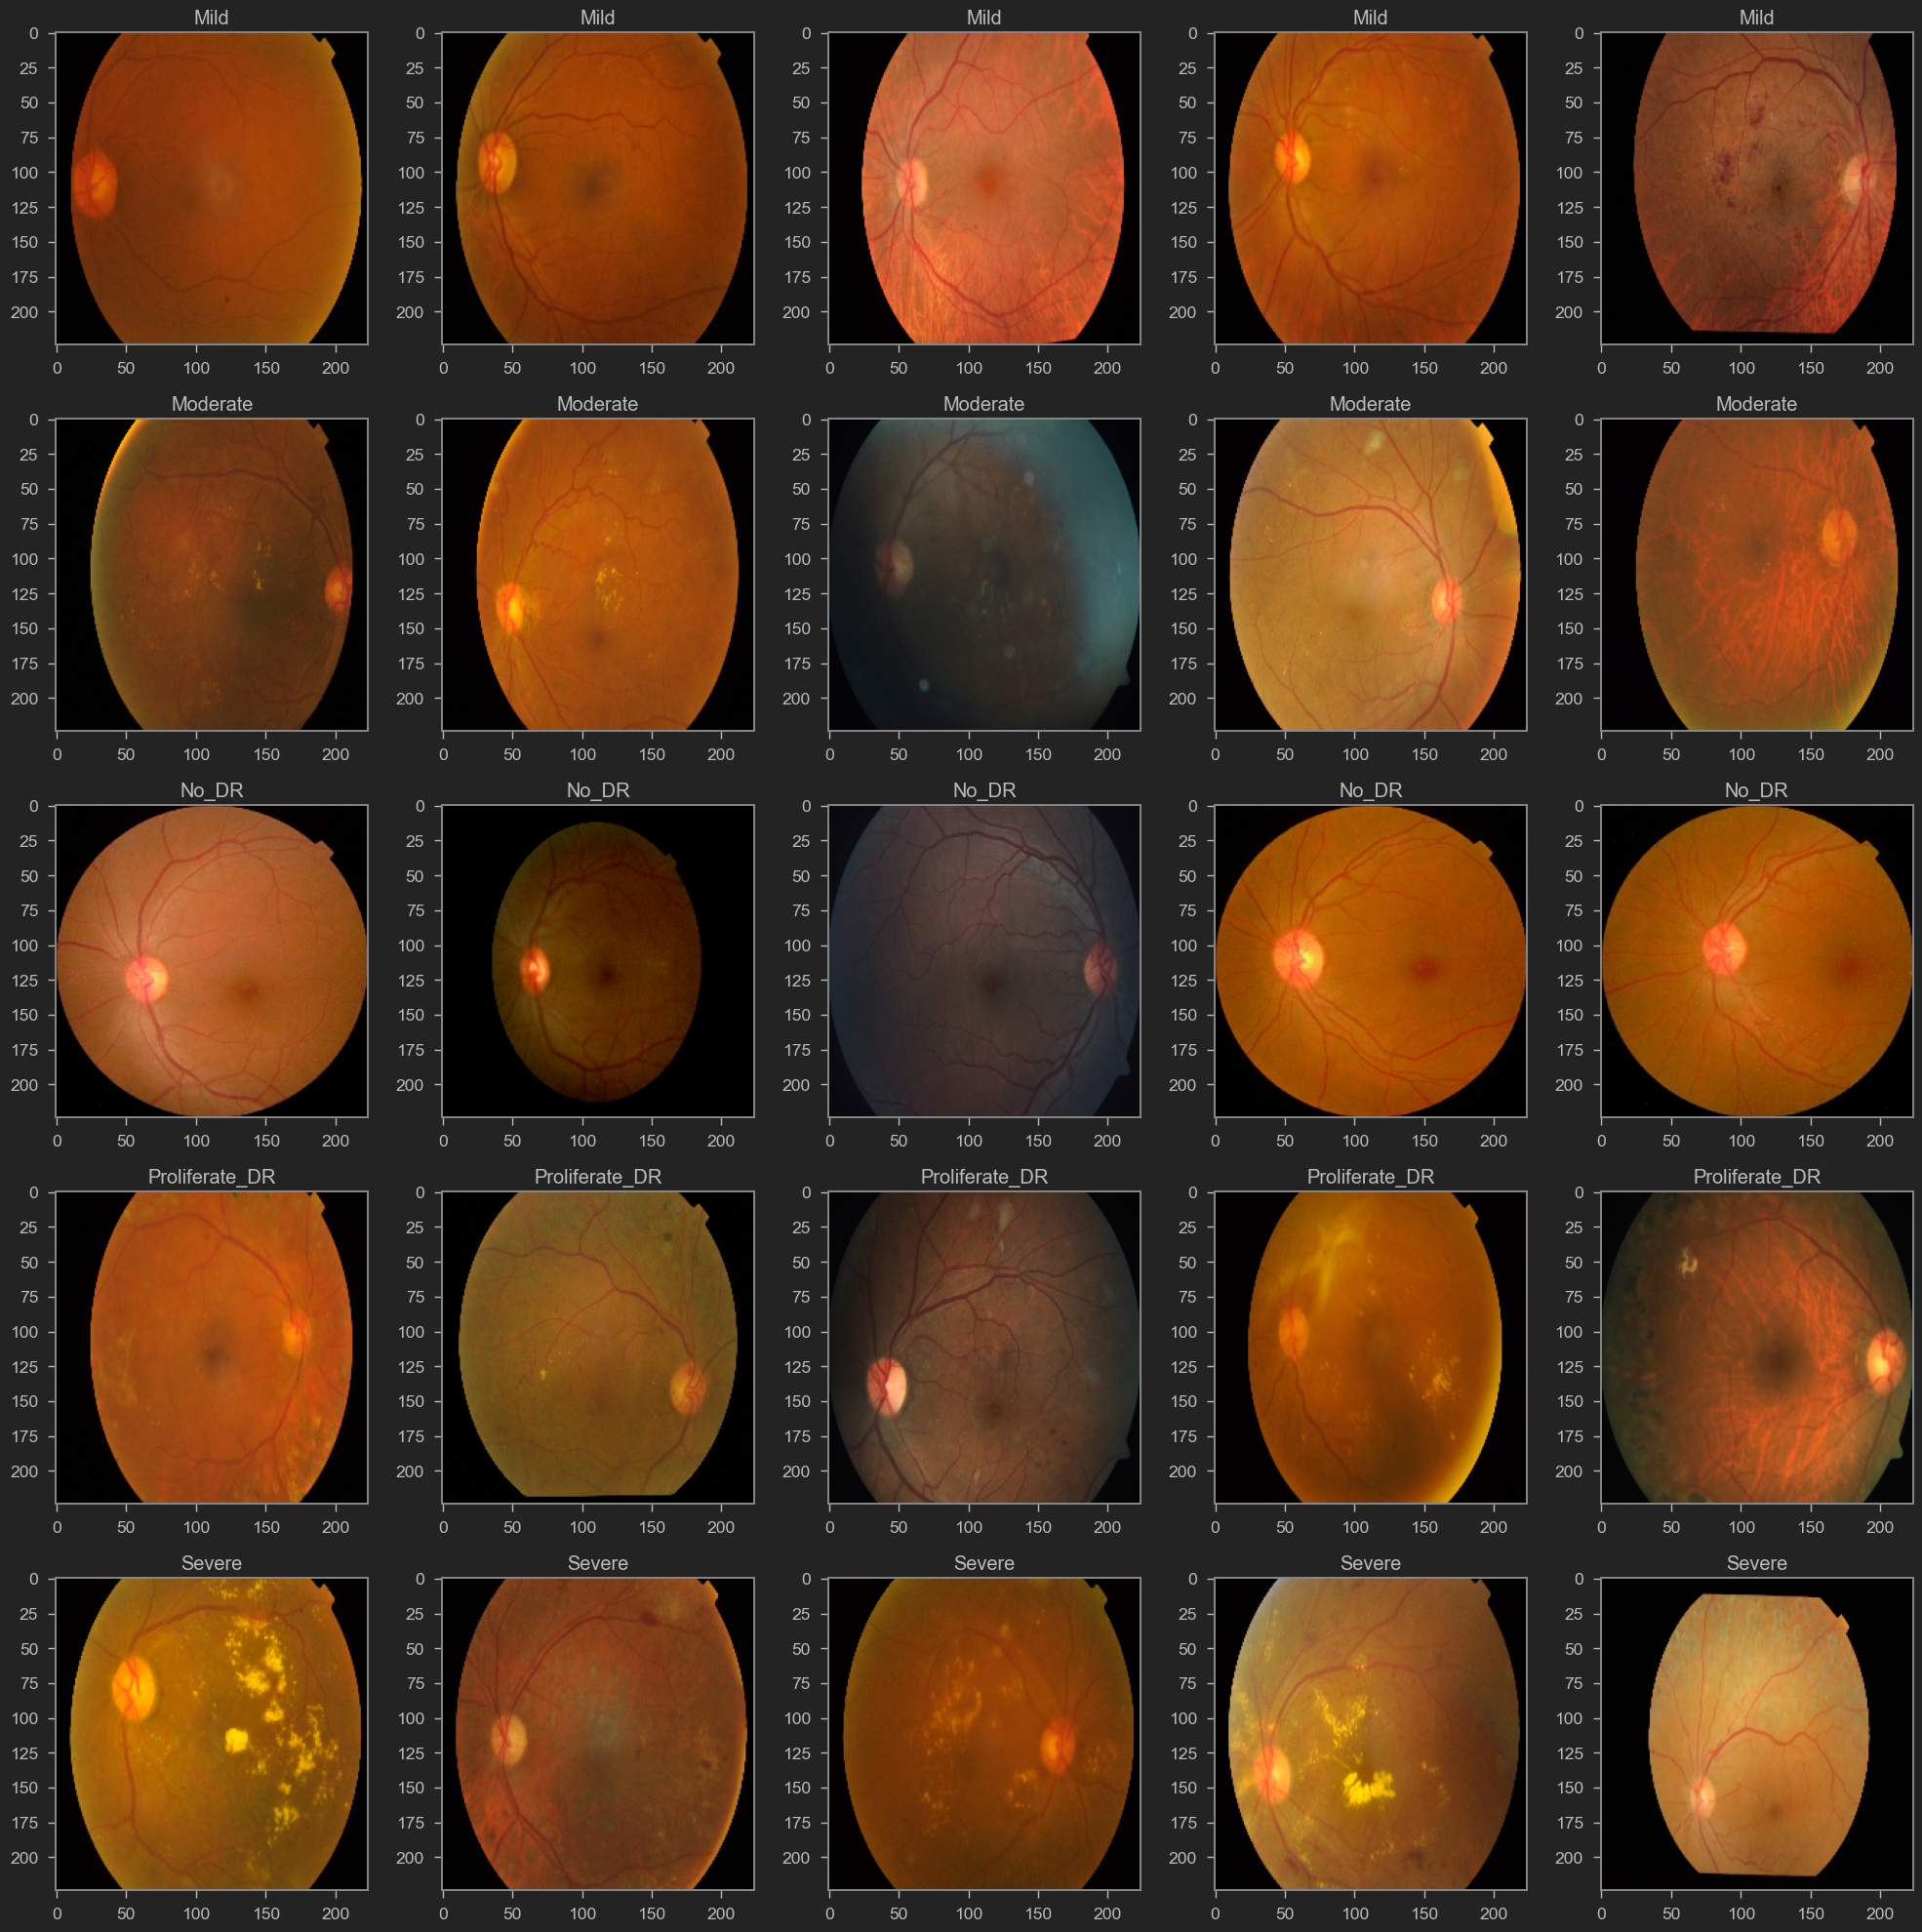

In [10]:
#Visualize 5 images for each class in the dataset

fig, axs = plt.subplots(5, 5, figsize= (20,20))
count = 0

for i in os.listdir('./train'):
    #get the list of images in a given class
    train_class = os.listdir(os.path.join('train',i))
    #plot 5 images per class
    for j in range(5):
        img = os.path.join('train',i,train_class[j])
        img=PIL.Image.open(img)
        axs[count][j].title.set_text(i)
        axs[count][j].imshow(img)
    count += 1

fig.tight_layout()

In [11]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('./train'):
    train_class = os.listdir(os.path.join('train',i))
    No_images_per_class.append(len(train_class))
    Class_name.append(i)
    print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in Mild = 370 

Number of images in Moderate = 999 

Number of images in No_DR = 1805 

Number of images in Proliferate_DR = 295 

Number of images in Severe = 193 



In [12]:
retina_df = pd.DataFrame({'Image':train,'Labels':label})
retina_df

Image  Labels
0       train\Mild\0024cdab0c1e.png    Mild
1       train\Mild\00cb6555d108.png    Mild
2       train\Mild\0124dffecf29.png    Mild
3       train\Mild\01b3aed3ed4c.png    Mild
4       train\Mild\0369f3efe69b.png    Mild
...                             ...     ...
3657  train\Severe\f9156aeffc5e.png  Severe
3658  train\Severe\fb61230b99dd.png  Severe
3659  train\Severe\fcc6aa6755e6.png  Severe
3660  train\Severe\fda39982a810.png  Severe
3661  train\Severe\fe0fc67c7980.png  Severe

[3662 rows x 2 columns]

In [13]:
#Shuffle the data and split it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2)

In [14]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    validation_split = 0.15
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False, 
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.3,
    dtype=None)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Creating datagenerator for training, validation and test dataset.

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


In [16]:
def res_block(X, filter, stage):
  
  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [17]:

input_shape = (256,256,3)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage

X = res_block(X, filter= [256,256,1024], stage= 4)

# # 5- stage

# X = res_block(X, filter= [512,512,2048], stage= 5)

#Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

#Final layer

X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


model = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 128, 128, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                           

 res_2_identity_2_b (Conv2D)    (None, 31, 31, 64)   36928       ['activation_7[0][0]']           
                                                                                                  
 bn_2_identity_2_b (BatchNormal  (None, 31, 31, 64)  256         ['res_2_identity_2_b[0][0]']     
 ization)                                                                                         
                                                                                                  
 activation_8 (Activation)      (None, 31, 31, 64)   0           ['bn_2_identity_2_b[0][0]']      
                                                                                                  
 res_2_identity_2_c (Conv2D)    (None, 31, 31, 256)  16640       ['activation_8[0][0]']           
                                                                                                  
 bn_2_identity_2_c (BatchNormal  (None, 31, 31, 256)  1024       ['res_2_identity_2_c[0][0]']     
 ization) 

 bn_3_identity_2_b (BatchNormal  (None, 15, 15, 128)  512        ['res_3_identity_2_b[0][0]']     
 ization)                                                                                         
                                                                                                  
 activation_17 (Activation)     (None, 15, 15, 128)  0           ['bn_3_identity_2_b[0][0]']      
                                                                                                  
 res_3_identity_2_c (Conv2D)    (None, 15, 15, 512)  66048       ['activation_17[0][0]']          
                                                                                                  
 bn_3_identity_2_c (BatchNormal  (None, 15, 15, 512)  2048       ['res_3_identity_2_c[0][0]']     
 ization)                                                                                         
                                                                                                  
 add_5 (Ad

 ization)                                                                                         
                                                                                                  
 activation_26 (Activation)     (None, 7, 7, 256)    0           ['bn_4_identity_2_b[0][0]']      
                                                                                                  
 res_4_identity_2_c (Conv2D)    (None, 7, 7, 1024)   263168      ['activation_26[0][0]']          
                                                                                                  
 bn_4_identity_2_c (BatchNormal  (None, 7, 7, 1024)  4096        ['res_4_identity_2_c[0][0]']     
 ization)                                                                                         
                                                                                                  
 add_8 (Add)                    (None, 7, 7, 1024)   0           ['bn_4_identity_2_c[0][0]',      
          

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])


In [19]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [20]:
history = model.fit(train_generator, steps_per_epoch=train_generator.n // 32, epochs=20, validation_data=validation_generator, validation_steps=validation_generator.n // 32, callbacks=[checkpointer, earlystopping])


Epoch 1/20
77/77 [==============================] - ETA: 0s - loss: 1.4196 - accuracy: 0.6330
Epoch 1: val_loss improved from inf to 1.41982, saving model to weights.hdf5
77/77 [==============================] - 513s 6s/step - loss: 1.4196 - accuracy: 0.6330 - val_loss: 1.4198 - val_accuracy: 0.4880
Epoch 2/20
77/77 [==============================] - ETA: 0s - loss: 0.9344 - accuracy: 0.6814
Epoch 2: val_loss did not improve from 1.41982
77/77 [==============================] - 412s 5s/step - loss: 0.9344 - accuracy: 0.6814 - val_loss: 1.5222 - val_accuracy: 0.2692
Epoch 3/20
77/77 [==============================] - ETA: 0s - loss: 0.7961 - accuracy: 0.7120
Epoch 3: val_loss did not improve from 1.41982
77/77 [==============================] - 402s 5s/step - loss: 0.7961 - accuracy: 0.7120 - val_loss: 1.5307 - val_accuracy: 0.2740
Epoch 4/20
77/77 [==============================] - ETA: 0s - loss: 0.7862 - accuracy: 0.7071
Epoch 4: val_loss did not improve from 1.41982
77/77 [=========

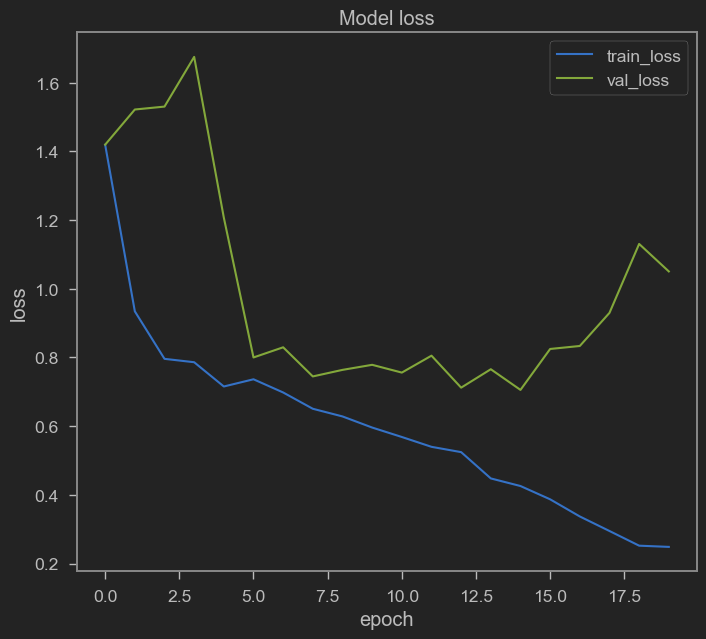

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [22]:
model.load_weights("retina_weights.hdf5")

In [23]:
# Evaluate the performance of the model
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

22/22 [==============================] - 18s 826ms/step - loss: 0.4036 - accuracy: 0.8679
Accuracy Test : 0.8678977489471436


In [24]:
# Assigning label names to the corresponding indexes
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3:'Proliferate_DR', 4: 'Severe'}

In [25]:
# Loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  #code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  #resizing the image to (256,256)
  img = img.resize((256,256))
  #appending image to the image list
  image.append(img)
  #converting image to array
  img = np.asarray(img, dtype= np.float32)
  #normalizing the image
  img = img / 255
  #reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  #making prediction of the model
  predict = model.predict(img)
  #getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  #appending the predicted class to the list
  prediction.append(labels[predict])
  #appending original class to the list
  original.append(test['Labels'].tolist()[item])


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 58ms/step


In [24]:
#Getting the test accuracy 
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.8240109140518418


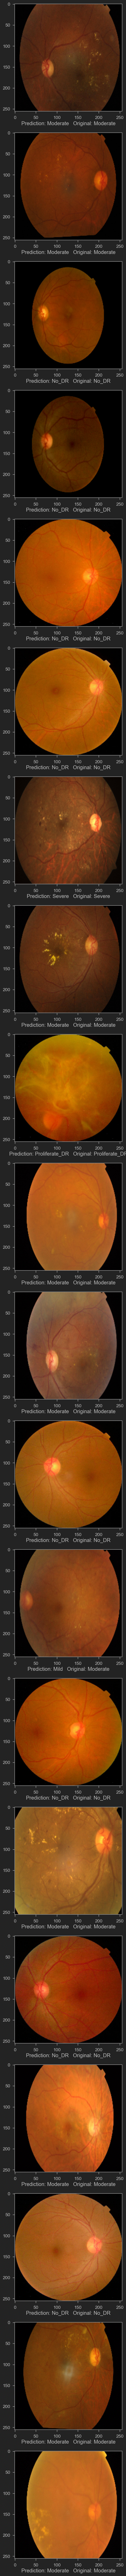

In [25]:
# Visualizing the results
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20, 1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

In [26]:
# Print out the classification report
print(classification_report(np.asarray(original), np.asarray(prediction)))


                precision    recall  f1-score   support

          Mild       0.77      0.56      0.65        72
      Moderate       0.72      0.81      0.76       204
         No_DR       0.93      0.99      0.96       349
Proliferate_DR       0.63      0.56      0.59        68
        Severe       0.74      0.42      0.54        40

      accuracy                           0.82       733
     macro avg       0.76      0.67      0.70       733
  weighted avg       0.82      0.82      0.82       733



Text(0.5, 1.0, 'Confusion_matrix')

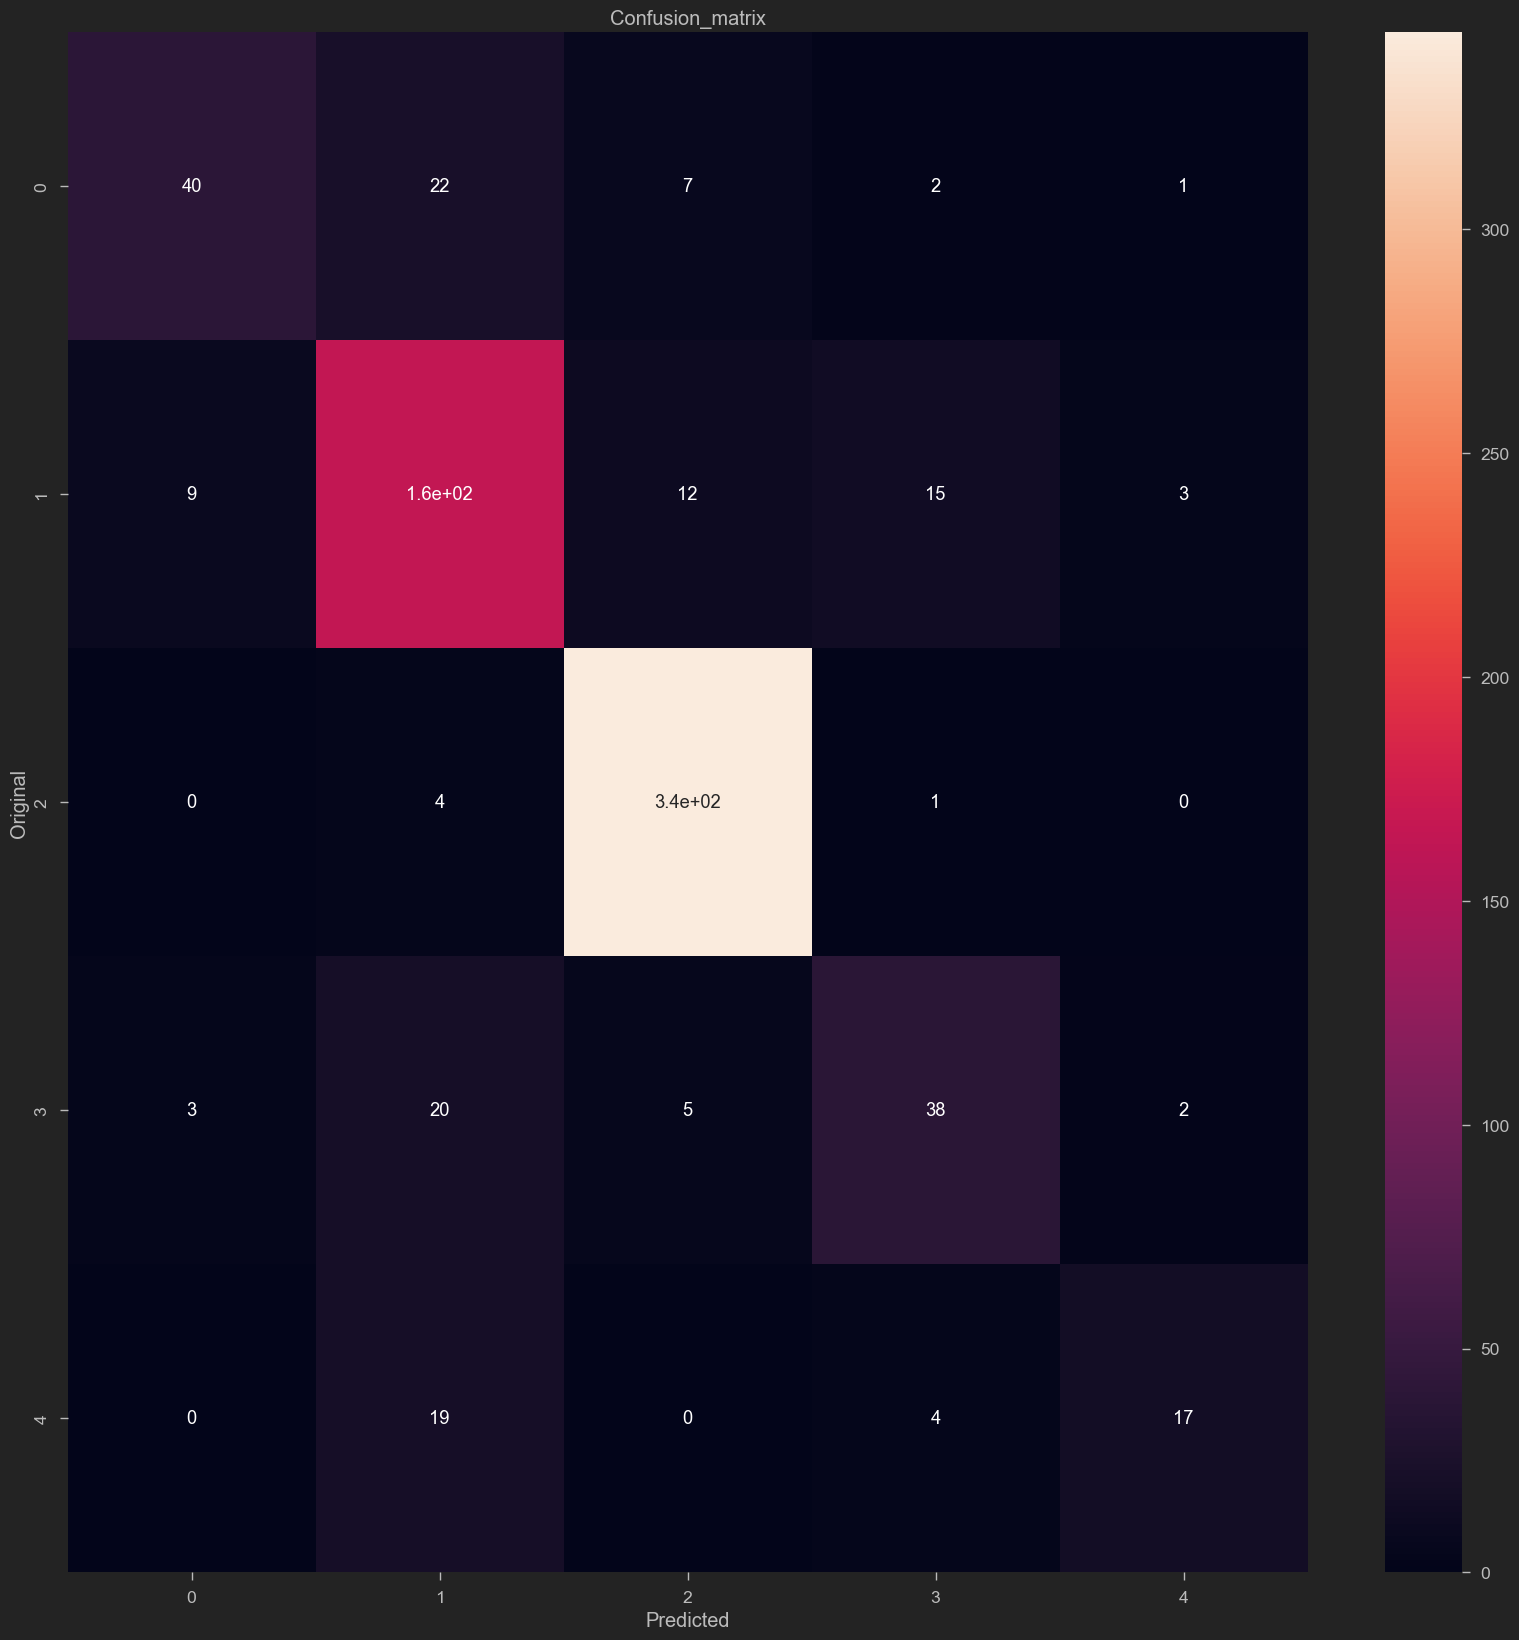

In [27]:

# plot the confusion matrix
plt.figure(figsize = (20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')
